Do some analysis on FPL players

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load teams and player data
players_data = pd.read_csv('players.csv')
teams_data = pd.read_csv('teams.csv')

# Load GW1 players data
gw1_data = pd.read_csv('GW1_players.csv')
print('No. of players in gameweek 1:', len(gw1_data))

No. of players in gameweek 1: 573


In [3]:
# Get players with at least 1 minute played
gw1_data_played = gw1_data[gw1_data['minutes'] > 0]
print('No. of players with more than 0 minutes played:', len(gw1_data_played))

No. of players with more than 0 minutes played: 297


In [5]:
# Plot histogram 
def plot_hist(axs, bins, data, xlabel=None, ylabel=None,
              ec='k', fc='lightsteelblue'):
    
    axs.hist(data, bins=bins, histtype='stepfilled', ec=ec,
             fc=fc)
    axs.set_xlim(data.min(), data.max())
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)

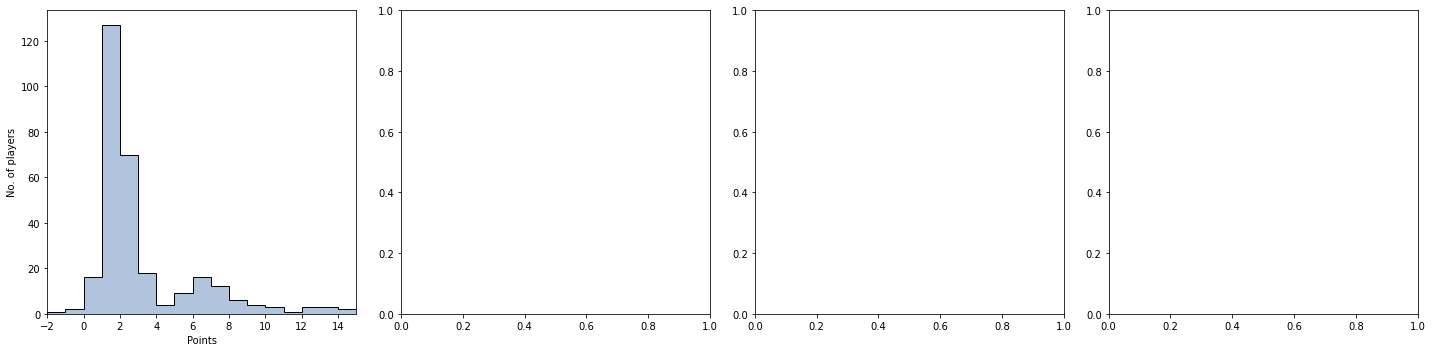

In [6]:
# Plot total points histogram
gw1_total_points = gw1_data_played['total_points'].values
total_points_bins = np.arange(gw1_total_points.min(), gw1_total_points.max()+1)

xlabel = 'Points'
ylabel = 'No. of players'
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

plot_hist(axs[0], bins=total_points_bins, data=gw1_total_points,
          xlabel=xlabel, ylabel=ylabel)

# Plot total points histogram for each position
gw1_gk_points = gw1_data_played[gw1_data_played['']]

plt.tight_layout()
plt.show()

In [28]:
np.median(points_bins) * 11

71.5

In [23]:
# Get top point earning players
n_players = 20
top_points = gw1_data_played.sort_values(by='total_points', ascending=False)[:n_players]

In [25]:
top_points

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
103,104,9,14,15,False,2022-08-07T13:00:00Z,1,2,1,90,...,44,72.0,19.3,76.0,16.7,55,0,13469,0,0
365,366,7,16,15,True,2022-08-06T14:00:00Z,2,0,1,90,...,43,66.0,14.6,25.0,10.6,45,0,40132,0,0
209,210,4,12,13,True,2022-08-06T11:30:00Z,2,2,1,90,...,57,82.0,14.7,58.0,15.5,65,0,509091,0,0
317,318,10,19,13,False,2022-08-07T15:30:00Z,0,2,1,77,...,48,62.6,4.8,73.0,14.0,115,0,3398599,0,0
445,446,8,17,13,True,2022-08-06T14:00:00Z,4,1,1,85,...,45,65.8,40.3,47.0,15.3,80,0,470486,0,0
72,73,2,2,12,True,2022-08-06T14:00:00Z,2,0,1,90,...,40,49.6,14.1,2.0,6.6,45,0,8029,0,0
282,283,4,9,12,False,2022-08-06T11:30:00Z,2,2,1,90,...,34,39.6,20.0,25.0,8.5,130,0,4848340,0,0
312,313,1,7,12,False,2022-08-05T19:00:00Z,0,2,1,82,...,38,40.0,23.3,21.0,8.4,50,0,1170032,0,0
129,130,3,8,11,False,2022-08-06T16:30:00Z,0,1,1,90,...,32,39.0,18.1,19.0,7.6,60,0,114916,0,0
482,483,5,11,10,False,2022-08-06T14:00:00Z,2,1,1,90,...,28,41.0,41.0,28.0,11.0,55,0,38556,0,0
